## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

--2026-01-27 14:53:49--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6025:18::a27d:4512, 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6025:18::a27d:4512|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/pkkpoxlm7beasryexpdf8/data_000637.txt?rlkey=rkm2em1v57hewglzelmin21c9 [following]
--2026-01-27 14:53:50--  https://www.dropbox.com/scl/fi/pkkpoxlm7beasryexpdf8/data_000637.txt?rlkey=rkm2em1v57hewglzelmin21c9
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6960fe727057f1627c1c687d26.dl.dropboxusercontent.com/cd/0/inline/C5wtAr3aWhF-HzTlms5ew0HbofCNOmSuR8U9keWfUlQAhQ7I_iDBe80bbs1rZ-DrkMqLtdtoKTRInWoJoFiaYAd1C8gEA9ZiHz12F0T4MdU2MW86F3gdfIXz3E1Hm7v2A-8/file# [following]
--2026-01-27 14:53:50--  https://uc6960fe727057f1627c1c687d26.dl.dropboxusercontent.com/cd/0/i

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:

#1
N=15000
data = pd.read_csv('data_000637.txt', nrows=N)
print(data.keys())
df = data.sort_values(by=['ORBIT_CNT','BX_COUNTER','TDC_MEAS'])
display(df)

Index(['HEAD', 'FPGA', 'TDC_CHANNEL', 'ORBIT_CNT', 'BX_COUNTER', 'TDC_MEAS'], dtype='object')


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
14995,1,1,4,3869200316,3399,9
14996,1,1,17,3869200316,3400,15
14997,1,1,10,3869200316,3530,16
14998,1,1,8,3869200316,3533,18


In [4]:
### 

#2
print('x =', max(data['BX_COUNTER'])+1)


x = 3564


In [5]:
#3
tot_data = pd.read_csv('data_000637.txt')
df_tot = tot_data.sort_values(by=['ORBIT_CNT','BX_COUNTER','TDC_MEAS'])
# print(tot_data.info())
h = 3564 * 25
inizio = df_tot.head(1)
fin = df_tot.tail(1)
start = (inizio['ORBIT_CNT'] * h + inizio['BX_COUNTER']*25 + inizio['TDC_MEAS']*25/30)*10e-9
stop = (fin['ORBIT_CNT'] * h + fin['BX_COUNTER']*25 + fin['TDC_MEAS']*25/30)*10e-9
print('data collecting time=', stop.iloc[0]-start.iloc[0], 's')

data collecting time= 9.804162533488125 s


In [6]:
#4
data['abs_time'] = (data['ORBIT_CNT'] * h + data['BX_COUNTER']*25 + data['TDC_MEAS']*25/30)
display(data)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,abs_time
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
14995,1,1,4,3869200316,3399,9,3.447457e+14
14996,1,1,17,3869200316,3400,15,3.447457e+14
14997,1,1,10,3869200316,3530,16,3.447457e+14
14998,1,1,8,3869200316,3533,18,3.447457e+14


In [7]:
#5

data['HEAD'] = np.random.choice([0,1], size=len(data))


In [8]:
#6

new_data = data.loc[data['HEAD'] == 1]
print(new_data)

       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS      abs_time
0         1     0          123  3869200167        2374        26  3.447457e+14
2         1     0           63  3869200167        2553        28  3.447457e+14
3         1     0           64  3869200167        2558        19  3.447457e+14
10        1     1            7  3869200167        2785         4  3.447457e+14
11        1     0           64  3869200167        2786        19  3.447457e+14
...     ...   ...          ...         ...         ...       ...           ...
14993     1     1           16  3869200316        3396        14  3.447457e+14
14994     1     1           19  3869200316        3396        11  3.447457e+14
14995     1     1            4  3869200316        3399         9  3.447457e+14
14996     1     1           17  3869200316        3400        15  3.447457e+14
14999     1     0          139  3869200316        3539         0  3.447457e+14

[7494 rows x 7 columns]


[0 1]


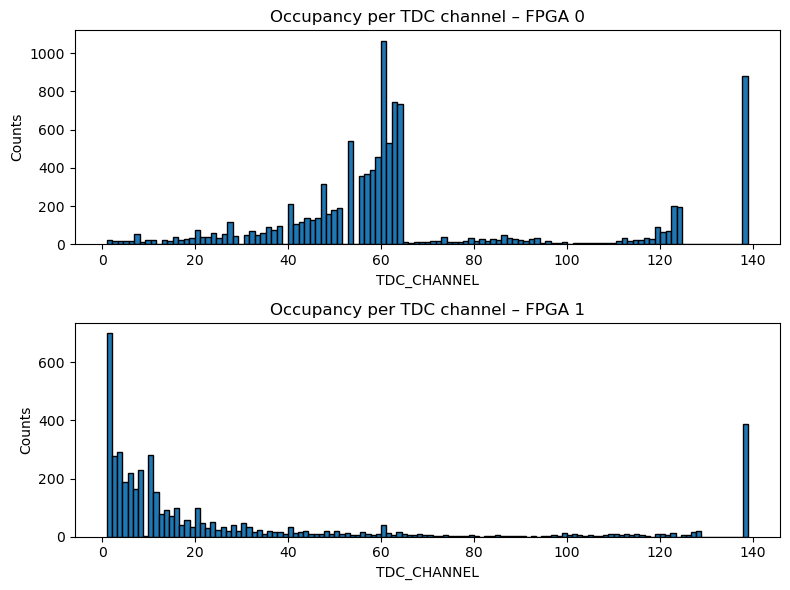

In [29]:
#7

print(data['FPGA'].unique())

df0 = data.loc[data['FPGA'] == 0]
df1 = data.loc[data['FPGA'] == 1]

bins0 = df0['TDC_CHANNEL'].nunique()
bins1 = df1['TDC_CHANNEL'].nunique()

fig, axes = plt.subplots(2, 1, figsize=(8,6))

axes[0].hist(df0['TDC_CHANNEL'], bins = bins0, edgecolor='black')
axes[0].set_title("Occupancy per TDC channel – FPGA=0")
axes[0].set_xlabel("TDC_CHANNEL")
axes[0].set_ylabel("Counts")

axes[1].hist(df1['TDC_CHANNEL'], bins = bins1, edgecolor='black')
axes[1].set_title("Occupancy per TDC channel – FPGA=1")
axes[1].set_xlabel("TDC_CHANNEL")
axes[1].set_ylabel("Counts")
plt.tight_layout()
plt.show()


In [40]:
#8

count = data.groupby(['TDC_CHANNEL']).size().reset_index(name='counts')
print(f'most noisy channel:\n {count.nlargest(3, 'counts')}')

most noisy channel:
      TDC_CHANNEL  counts
128          139    1268
63            64     752
62            63     749


In [41]:
#9

# Filtra i dati per TDC_CHANNEL = 139
data_139 = data[data['TDC_CHANNEL'] == 139]

# Conta gli ORBIT distinti in questo sottoinsieme
num_orbit_139 = data_139['ORBIT_CNT'].nunique()
print("Numero di ORBIT con almeno una misura dal canale 139:", num_orbit_139)


Numero di ORBIT con almeno una misura dal canale 139: 150
